## Implementing the convolution operation

In order to understand the mechanism of the discrete convolution operation, lets do a simple intuitive implementation of this concept, and apply it over a sample image, with different types of kernels.
Let's import the needed libraries. As we will implement the algorithms in a most clear possible way, we will just use the minimum necessary ones, like numpy (Which is used in a basic manner )

In [1]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

Using the imread method of the imageio package, let's read the image (imported as 3 equal channels, being grayscale), we then slice the first channel, convert it as a float point, and show it using matplotlib.

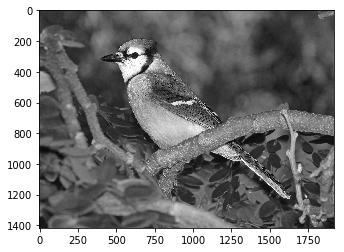

In [2]:
arr = imageio.imread("blue_jay.jpg") [:,:,0].astype(np.float)
plt.imshow(arr, cmap=plt.get_cmap('binary_r'))
plt.show()

Now its time to define the kernel convolution operation. As we see we will simplify the operation on a 3x3 kernel, in order to better understand the border conditions.
The apply3x3kernel will appy the kernel over all the elements of the image, returning a new equivalent image. Note that we are restricting the kernels to 3x3 for simplicity, and so the 1pz border of the image won't have any new value, because we are not taking padding in consideration.

In [3]:
class ConvolutionalOperation:
    def apply3x3kernel(self, image, kernel):  # Simple 3x3 kernel operation
        newimage=np.array(image)
        for m in range(1,image.shape[0]-2):
            for n in range(1,image.shape[1]-2):
                newelement = 0
                for i in range(0, 3):
                    for j in range(0, 3):
                        newelement = newelement + image[m - 1 + i][n - 1+ j]*kernel[i][j]
                newimage[m][n] = newelement
        return (newimage)

As we saw on the previous sections, the different kernel configurations highlight different elements and properties of the original image, building filters that in conjunction, can after many epochs of training specialize in very high level features, like eyes, ears, doors, etc.
Here we will generate a dictionary of kernels, with a name as key, and the coefficients of the kernel in a 3x3 array fashion.
The blur filter is equivalent to calculating the average on the 3x3 point neighborhood, Identity simple returns the pixel value as is, laplacian is a classic derivative filter, which highlights borders, and then the two Sobel filters we will generate will mark, in the first case horizontal edges, and in the second, vertical ones.

In [4]:
kernels = {"Blur":[[1./16., 1./8., 1./16.], [1./8., 1./4., 1./8.], [1./16., 1./8., 1./16.]]
           ,"Identity":[[0, 0, 0], [0., 1., 0.], [0., 0., 0.]]
           ,"Laplacian":[[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]]
           ,"Left Sobel":[[1., 0., -1.], [2., 0., -2.], [1., 0., -1.]]
           ,"Upper Sobel":[[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]]}

Let's then generate a ConvolutionalOperation object, and generate a comparative kernel graphical chart, to see how they compare:

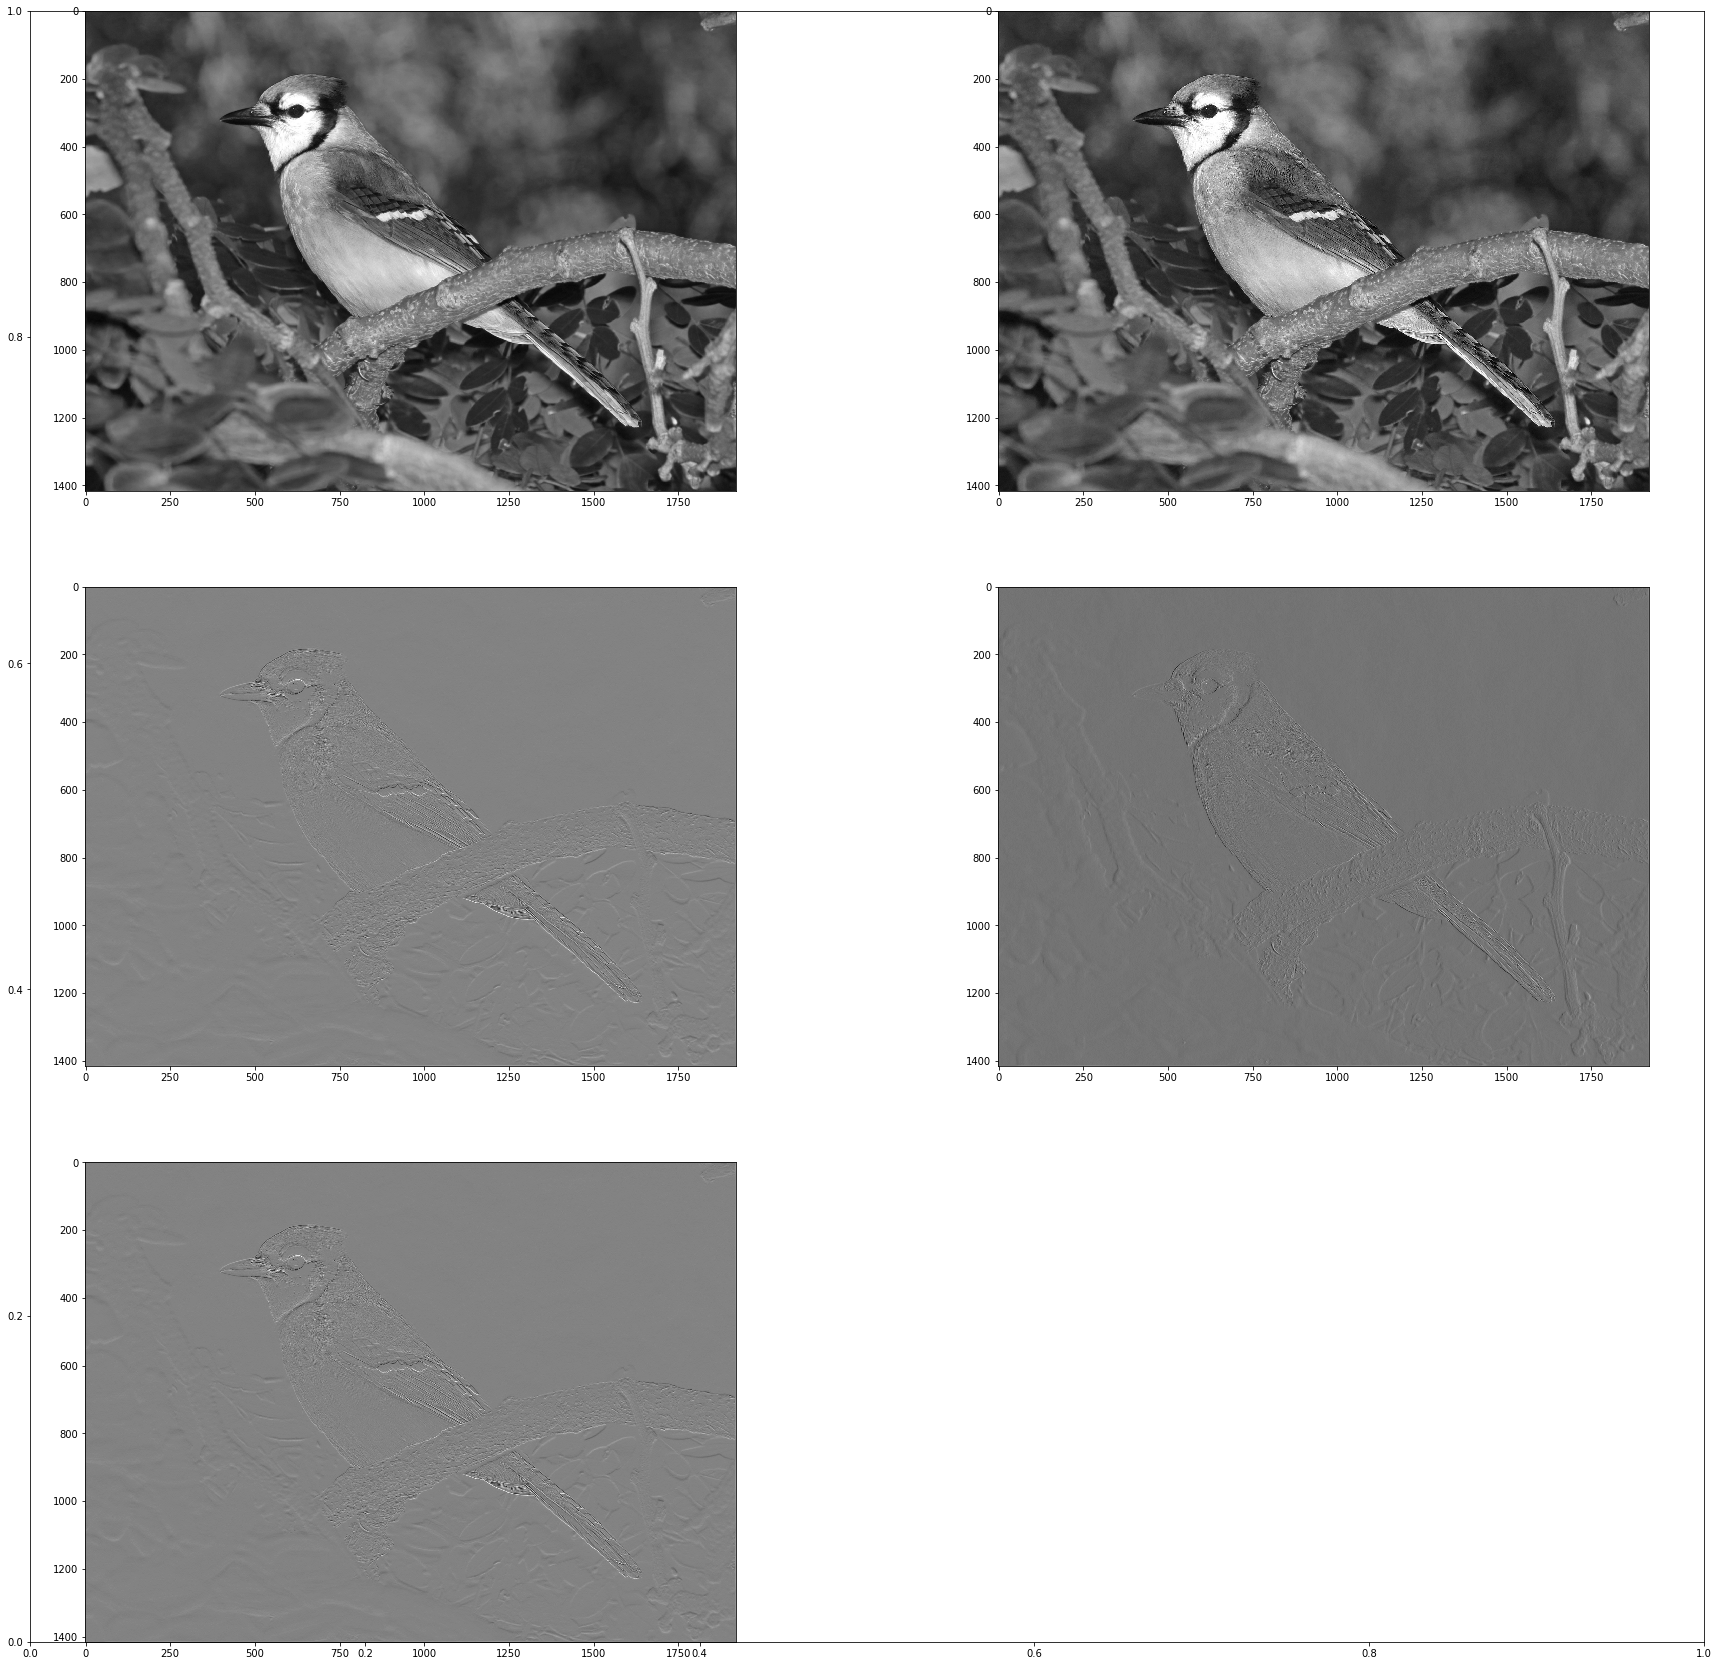

In [5]:
conv = ConvolutionalOperation()
plt.figure(figsize=(30,30))
fig, axs = plt.subplots(figsize=(30,30))
j=1
for key,value in kernels.items():
    axs = fig.add_subplot(3,2,j)
    out = conv.apply3x3kernel(arr, value)
    plt.imshow(out, cmap=plt.get_cmap('binary_r'))
    j=j+1
plt.savefig("Convolution.jpg")
plt.show()

Now it's time to write a simple pooling operator. It's much more easy and direct to write as the convolutional one, and the in this case we will be just implementing the max pooling, wich chooses the brightest pixel in the 4x4 vicinity, and projects to the final image. Other common operations are minimum, and average value.

In [6]:
class PoolingOperation:
    def apply2x2pooling(self, image, stride):  # Simple 2x2 kernel operation
        newimage=np.zeros((int(image.shape[0]/2),int(image.shape[1]/2)),np.float32)
        for m in range(1,image.shape[0]-2,2):
            for n in range(1,image.shape[1]-2,2):
                newimage[int(m/2),int(n/2)] = np.max(image[m:m+2,n:n+2])
        return (newimage)

Let's apply the newly created pooling operation, and as you see, the final image resolutin is much more blocky, and the details in general are brighter.

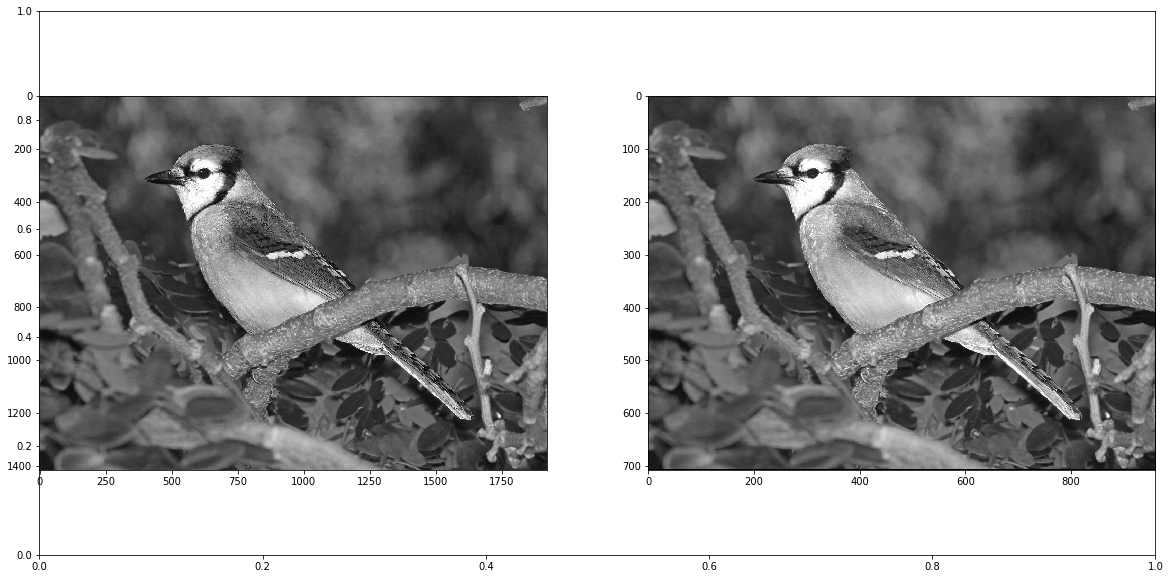

In [7]:
plt.figure(figsize=(30,30))
pool=PoolingOperation()
fig, axs = plt.subplots(figsize=(20,10))
axs = fig.add_subplot(1,2,1)
plt.imshow(arr, cmap=plt.get_cmap('binary_r'))
out=pool.apply2x2pooling(arr,1)
axs = fig.add_subplot(1,2,2)
plt.imshow(out, cmap=plt.get_cmap('binary_r'))
plt.savefig("Pooling operation.jpg")
plt.show()